# Business Understanding

### Quetions

1. Is there a correlation between Plasma Glucose (PRG) levels and the development of sepsis in ICU patients?
2. How does Blood Work Result-1 (PL) relate to the likelihood of sepsis in patients in the ICU?
3. Is there a significant association between Blood Pressure (PR) and the occurrence of sepsis in ICU patients?
4. What is the relationship between Blood Work Result-2 (SK) and the likelihood of sepsis in ICU patients?
5. How does Blood Work Result-3 (TS) correlate with the development of sepsis in ICU patients?
6. Is there a connection between Body Mass Index (M11) and the likelihood of sepsis in patients in the ICU?
7. Does Blood Work Result-4 (BD2) show a significant association with the occurrence of sepsis in ICU patients?
8. What is the impact of age on the likelihood of sepsis in patients in the ICU?
9. Does the presence of valid insurance influence the likelihood of developing sepsis in ICU patients?
10. How do these variables collectively contribute to predicting the occurrence of sepsis in ICU patients?

# Data Understanding

In [41]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,FunctionTransformer,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Import Data

In [42]:
df =pd.read_csv("data\Paitients_Files_Train.csv")
df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


In [4]:
#check info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [43]:
#check for duplicates
df.duplicated().sum()

0

In [44]:
#check for null values
df.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [7]:
#check the statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [47]:
df['Sepssis_num']=df['Sepssis'].map({'Positive':1,'Negative':0})

df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,Sepssis_num
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive,1
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative,0
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive,1
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative,0
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative,0
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive,1
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative,0
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative,0


In [10]:
pp=df['PRG'].corr(df['Sepssis_num'])
pp

0.20711491012845182

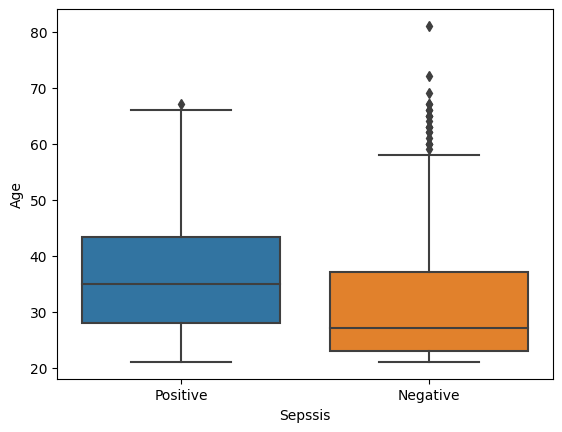

In [11]:
sns.boxplot(x='Sepssis',y='Age',data=df)
plt.show()

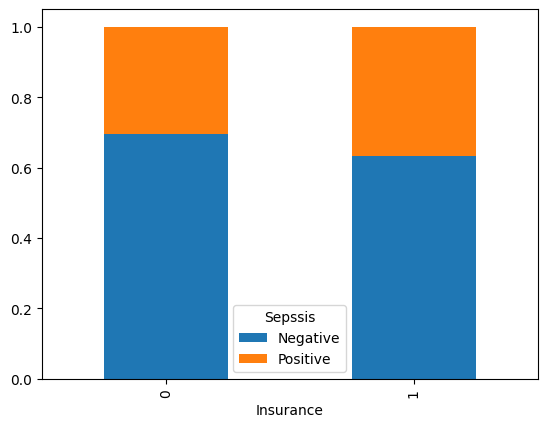

In [13]:
insuraance_sepsis=df.groupby('Insurance')['Sepssis'].value_counts(normalize=True).unstack()
insuraance_sepsis.plot(kind='bar',stacked=True)
plt.show()

### Univariate ananlysis

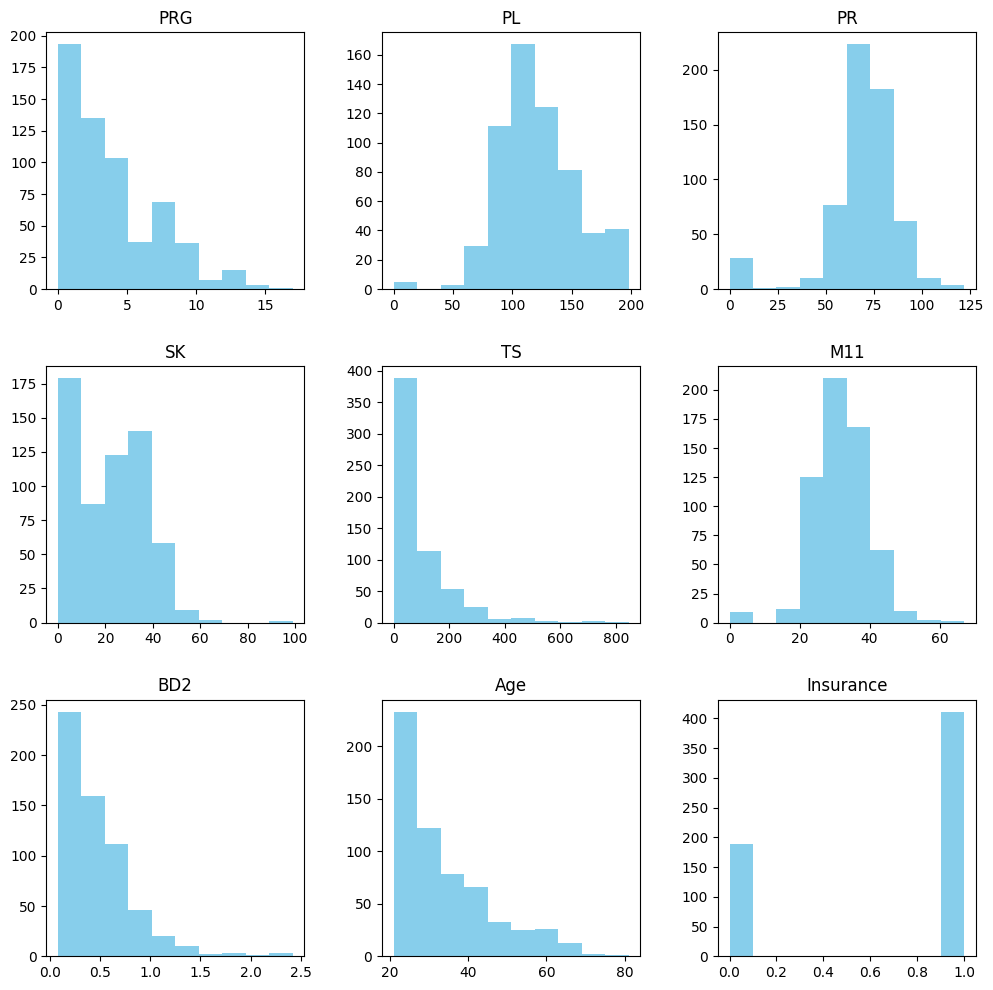

In [51]:
df.hist(figsize=(12,12),grid=False,color='skyblue')
plt.show()

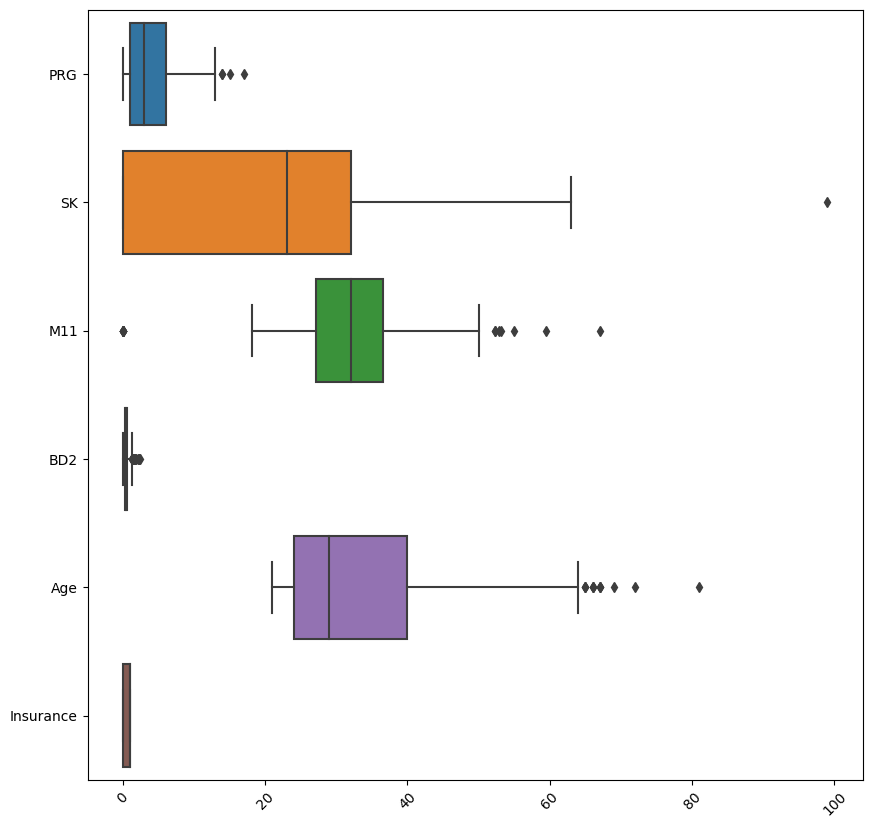

In [52]:
df_without_ts=df.drop(['TS','PL','PR'],axis=1)
plt.figure(figsize=(10,10))
sns.boxplot(data=df_without_ts,orient='horizontal')
plt.xticks(rotation=45)
plt.show()

### Bi variate

C:\Users\Geoffrey\AppData\Local\Temp\ipykernel_13192\1642365224.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation =df.corr()


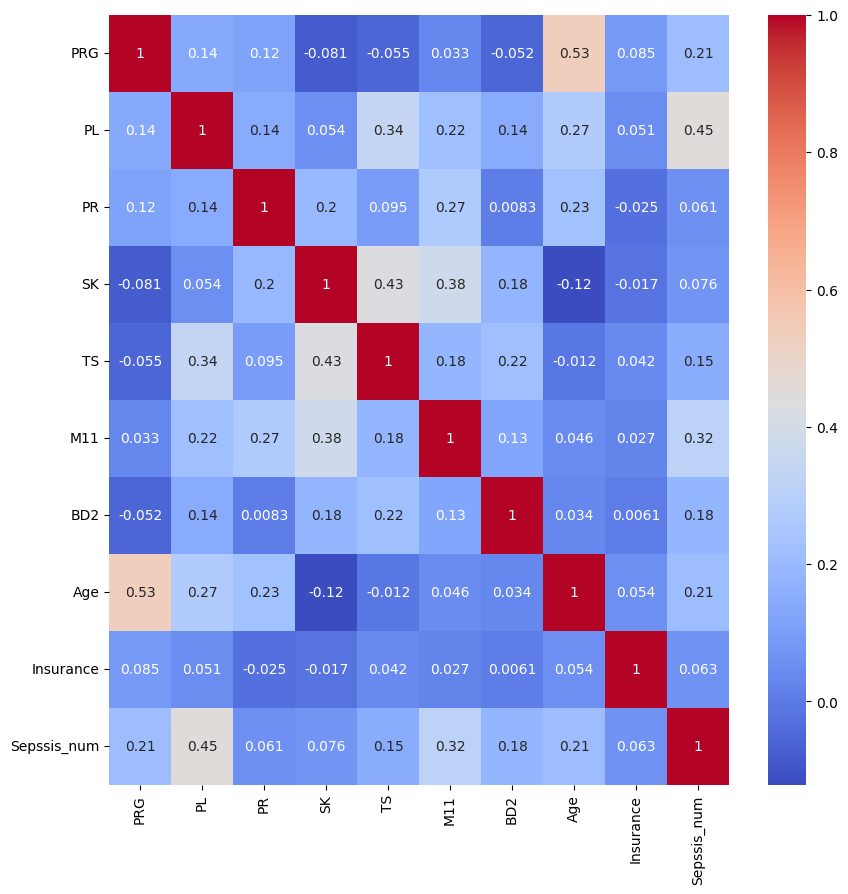

In [14]:
correlation =df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.show()

# Data Preparation

In [48]:
#get the column names for the data(df)
df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis', 'Sepssis_num'],
      dtype='object')

In [49]:
X=df.drop(['ID','Sepssis','Sepssis_num'],axis=1)
X.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
y=df['Sepssis']
y

0      Positive
1      Negative
2      Positive
3      Negative
4      Positive
         ...   
594    Negative
595    Positive
596    Negative
597    Negative
598    Positive
Name: Sepssis, Length: 599, dtype: object

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42, stratify=y)

In [51]:
input_features=X.columns 
input_features

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')

#### Create a pipeline

In [72]:
prep=ColumnTransformer(
    transformers=[
        ('scaler',StandardScaler(),input_features),
         ('log_trans',FunctionTransformer(np.log1p),input_features)
    ]
    
)


## Modeling

In [73]:
neighbors=KNeighborsClassifier()
pipeline=Pipeline(steps=[
    ('preprocessor',prep),
    ('neighbors',neighbors)
])

In [55]:
encoder= LabelEncoder()
y_train_encoded=encoder.fit_transform(y_train)
y_test_encoded=encoder.transform(y_test)

In [56]:
pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('log_trans',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('neighbors', KNeighborsClassifier())])

In [57]:
y_train.value_counts()

Negative    313
Positive    166
Name: Sepssis, dtype: int64

In [58]:
KNNPred=pipeline.predict(X_test)

In [59]:
knn_report=classification_report(y_test_encoded,KNNPred)

              precision    recall  f1-score   support

           0       0.77      0.78      0.78        78
           1       0.59      0.57      0.58        42

    accuracy                           0.71       120
   macro avg       0.68      0.68      0.68       120
weighted avg       0.71      0.71      0.71       120



## logistic reg

In [60]:
lg_regression=LogisticRegression()

In [61]:
lg_pipeline=Pipeline(steps=[
    ('preprocessor',prep),
    ('logistic_regression',lg_regression)
])

In [62]:
lg_pipeline.fit(X_train, y_train_encoded)

c:\Users\Geoffrey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('log_trans',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('logistic_regression', LogisticRegression())])

In [63]:
lg_pred=lg_regression.predict(X_test)

c:\Users\Geoffrey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: X has 9 features, but LogisticRegression is expecting 18 features as input.

In [22]:
print(classification_report(y_test_encoded,lg_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.35      1.00      0.52        42

    accuracy                           0.35       120
   macro avg       0.17      0.50      0.26       120
weighted avg       0.12      0.35      0.18       120



c:\Users\Geoffrey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Geoffrey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Geoffrey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

## Random Forest

In [64]:
randomforest=RandomForestClassifier(random_state=42)

rand_pipe=Pipeline(steps=[
    ('preprocessor',prep),
    ('radforest',randomforest)
])

In [65]:
rand_pipe.fit(X_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('log_trans',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('radforest', RandomForestClassifier(random_state=42))])

In [66]:
rand_pred=rand_pipe.predict(X_test)

In [67]:
rf_report=classification_report(y_test_encoded,rand_pred)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        78
           1       0.60      0.60      0.60        42

    accuracy                           0.72       120
   macro avg       0.69      0.69      0.69       120
weighted avg       0.72      0.72      0.72       120



## Svc

In [68]:
svc=SVC(random_state=42)

svc_pipe=Pipeline(steps=[
    ('preprocessor',prep),
    ('radforest',svc)
])

In [69]:
svc_pipe.fit(X_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('log_trans',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('radforest', SVC(random_state=42))])

In [70]:
svc_pred=rand_pipe.predict(X_test)

In [71]:
svc_report=classification_report(y_test_encoded,svc_pred)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        78
           1       0.60      0.60      0.60        42

    accuracy                           0.72       120
   macro avg       0.69      0.69      0.69       120
weighted avg       0.72      0.72      0.72       120



In [68]:
import joblib

joblib.dump(pipeline,'pipeline.joblib')
joblib.dump(encoder,'encoder.joblib')

['encoder.joblib']